In [98]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
dataset = read_csv('../datasets/mnist_data/train.csv').values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
X_train, X_test = X_train/255, X_test/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [15]:
y_train_one_hot = np_utils.to_categorical(y_train)

In [91]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [96]:
hist = model.fit(X_train, y_train_one_hot, epochs=20, shuffle=True, batch_size=200, validation_data=(X_test, np_utils.to_categorical(y_test)))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0330 - acc: 0.9929 - val_loss: 0.1003 - val_acc: 0.9694
Epoch 2/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0326 - acc: 0.9931 - val_loss: 0.0999 - val_acc: 0.9693
Epoch 3/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0323 - acc: 0.9934 - val_loss: 0.1001 - val_acc: 0.9696
Epoch 4/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0320 - acc: 0.9934 - val_loss: 0.1000 - val_acc: 0.9700
Epoch 5/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0316 - acc: 0.9935 - val_loss: 0.0999 - val_acc: 0.9695
Epoch 6/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0314 - acc: 0.9936 - val_loss: 0.0998 - val_acc: 0.9693
Epoch 7/20
33600/33600 [==============================] - 1s 33us/step - loss: 0.0310 - acc: 0.9937 - val_loss: 0.0994 - val_acc:

In [93]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

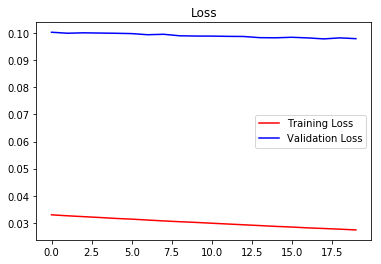

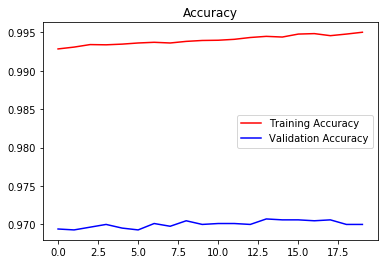

In [97]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training Loss')
plt.plot(hist.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [123]:
# Functional API
from keras.models import Model

X = Input(shape=(784, ))
fc1 = Dense(256, activation='relu')(X)
fc2 = Dense(64, activation='relu')(fc1)
yhat = Dense(10, activation='softmax')(fc2)

fmodel = Model(inputs=X, outputs=yhat)

In [124]:
fmodel.summary()
fmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_53 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [107]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
dataset = read_csv('../datasets/fashion-mnist.csv').values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
X_train, X_test = X_train/255, X_test/255
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 784) (2000, 784) (8000, 10) (2000, 10)


In [125]:
hist = fmodel.fit( X_train, y_train, 
            shuffle=True,
            epochs=20,
            batch_size=128,
            validation_data=(X_test, y_test)
          )

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 0s 43us/step - loss: 0.8920 - acc: 0.7053 - val_loss: 0.5831 - val_acc: 0.8025
Epoch 2/20
8000/8000 [==============================] - 0s 42us/step - loss: 0.5233 - acc: 0.8166 - val_loss: 0.5308 - val_acc: 0.8200
Epoch 3/20
8000/8000 [==============================] - 0s 44us/step - loss: 0.4755 - acc: 0.8314 - val_loss: 0.4733 - val_acc: 0.8445
Epoch 4/20
8000/8000 [==============================] - 0s 44us/step - loss: 0.4194 - acc: 0.8548 - val_loss: 0.4949 - val_acc: 0.8350
Epoch 5/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.4076 - acc: 0.8552 - val_loss: 0.4768 - val_acc: 0.8445
Epoch 6/20
8000/8000 [==============================] - 0s 43us/step - loss: 0.3841 - acc: 0.8646 - val_loss: 0.5307 - val_acc: 0.8140
Epoch 7/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.3479 - acc: 0.8761 - val_loss: 0.4379 - val_acc: 0.8525
Epoch 8

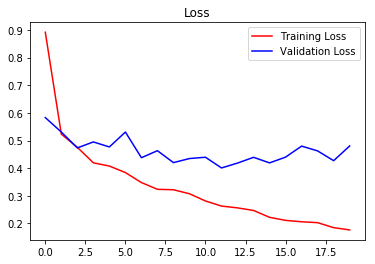

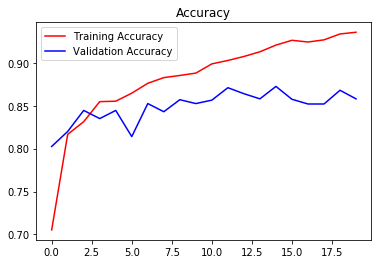

In [126]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training Loss')
plt.plot(hist.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [140]:
fmodel.save('model.h5')
fmodel.save('model_weights.h5')

In [141]:
loaded = keras.models.load_model('model.h5')
loaded.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_53 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


array([[2.6995486e-03, 2.5059909e-03, 3.0695725e-02, 1.8330006e-04,
        1.5313342e-05, 8.3949661e-04, 9.6260107e-01, 1.2897275e-04,
        3.2261258e-04, 7.9555875e-06]], dtype=float32)